In [1]:
import pandas as pd

# Define the resampling interval (e.g., '5T' stands for 5 minutes)
bin_interval = '5T'

# Process death data
df_death = pd.read_csv("death_vital_signs.csv", index_col=0, parse_dates=True)
# Resample the data into 5-minute bins using the mean of each column
df_death_binned = df_death.resample(bin_interval).mean()
# Write the binned data to a new CSV file
df_death_binned.to_csv("death_vital_signs_binned.csv")

# Process survived data
df_survived = pd.read_csv("survived_vital_signs.csv", index_col=0, parse_dates=True)
df_survived_binned = df_survived.resample(bin_interval).mean()
df_survived_binned.to_csv("survived_vital_signs_binned.csv")


/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_95747/2664664593.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_death_binned = df_death.resample(bin_interval).mean()
/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_95747/2664664593.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_survived_binned = df_survived.resample(bin_interval).mean()


In [2]:
import pandas as pd
import json

# Set the resampling interval (5 minutes)
bin_interval = "5T"  # '5T' means 5 minutes

def process_vital_signs(csv_file):
    """Load, resample, and format time column in a CSV file."""
    df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
    
    # Resample and take the mean of each bin
    df_binned = df.resample(bin_interval).mean().dropna(how="all")

    # Reset index and format time column
    df_binned = df_binned.reset_index().rename(columns={df_binned.columns[0]: "Time"})

    # Convert "Time" column to string format for JSON compatibility
    df_binned["Time"] = df_binned["Time"].astype(str)  # Convert entire column to string

    return df_binned.to_dict(orient="records")

# Process death and survived CSV files
death_list = process_vital_signs("death_vital_signs.csv")
survived_list = process_vital_signs("survived_vital_signs.csv")

# Combine into one dictionary with the desired structure
combined = {
    "Death": death_list,
    "Survived": survived_list
}

# Write the combined data to a JSON file
with open("vital_signs_binned.json", "w") as f:
    json.dump(combined, f, indent=2)

print("Binned JSON file 'vital_signs_binned.json' has been created.")


/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_95747/2790501174.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_binned = df.resample(bin_interval).mean().dropna(how="all")
/var/folders/mc/pqzrh76907q0xgjhwr6gtp780000gn/T/ipykernel_95747/2790501174.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_binned = df.resample(bin_interval).mean().dropna(how="all")


TypeError: Object of type Timestamp is not JSON serializable

In [3]:
import pandas as pd
import vitaldb
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5)

ModuleNotFoundError: No module named 'vitaldb'

In [78]:
# Load clinical data from the API
url = 'https://api.vitaldb.net/cases'
clinical_data = pd.read_csv(url)

In [81]:
el = clinical_data[clinical_data['opname'] == 'Exploratory laparotomy']

In [90]:
el

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,preop_ph,preop_hco3,preop_be,preop_pao2,preop_paco2,preop_sao2,cormack,airway,tubesize,dltubesize,lmasize,iv1,iv2,aline1,aline2,cline1,cline2,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
106,107,31,0,19848,-1215,20025.0,1725,18525,-223860,1590540,0,0,54.0,M,164.9,63.15,23.2,2.0,0,General surgery,Others,Advanced gastric cancer,Exploratory laparotomy,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,10.5,395.0,88.0,31.1,142.0,4.1,105.0,4.5,14.0,17.0,19.0,0.95,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN,140.0,100.0,0,0,1000.0,0,150,0.0,0,100,0,40,10,0,0
137,138,1272,0,11661,-1996,10904.0,1304,10604,-233580,371220,0,0,65.0,F,152.2,39.00,16.8,2.0,1,General surgery,Others,Pseudomyxoma peritonei,Exploratory laparotomy,Open,Lithotomy,General,0,0,Normal Sinus Rhythm,Normal,13.0,270.0,114.0,34.2,140.0,4.0,92.0,3.7,21.0,19.0,5.0,0.72,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.0,NaN,NaN,Left forearm,Right leg,Right radial,NaN,NaN,NaN,350.0,100.0,0,0,1650.0,0,0,0.0,0,65,0,10,0,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,6290,5990,0,21199,-1649,22351.0,2851,20649,-1803420,6836580,81,0,82.0,M,171.3,72.30,24.6,3.0,1,General surgery,Others,"Subarachnoid hemorrhage, traumaticwithout open...",Exploratory laparotomy,Open,Supine,General,1,0,Normal Sinus Rhythm,Normal,8.5,109.0,65.0,34.8,135.0,3.4,148.0,2.9,91.0,755.0,52.0,1.55,7.397,23.9,-0.6,89.9,39.1,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left dorsalis pedis,Right femoral,Right IJV,Right antecubital,100.0,245.0,2,0,3900.0,0,0,3.0,0,50,0,0,0,0,300
6329,6330,1719,0,9532,-147,8853.0,1953,8553,-300720,2809680,3,0,59.0,M,158.3,57.20,22.8,3.0,0,General surgery,Others,"Common bile duct cancer, distal",Exploratory laparotomy,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,9.0,130.0,43.0,31.8,139.0,3.2,123.0,2.5,23.0,17.0,18.0,0.99,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left hand,Right forearm,Left radial,Right radial,Right IJV,NaN,50.0,770.0,0,0,750.0,0,0,0.0,0,10,0,0,80,0,0


In [82]:
url = 'https://api.vitaldb.net/labs'
labs = pd.read_csv(url)

In [86]:
caseids = list(el['caseid'])
labs

,caseid,dt,name,result
0,1,594470,alb,2.90
1,1,399575,alb,3.20
...,...,...,...,...
928446,6388,-249820,wbc,7.66
928447,6388,62645,wbc,11.34


In [88]:
# Filter labs for the desired caseids and negative dt values
filtered_labs = labs[labs['caseid'].isin(caseids) & (labs['dt'] < 0)]

# Create a pivot table with an aggregation function (mean)
pivoted_labs = filtered_labs.pivot_table(
    index='caseid',
    columns='name',
    values='result',
    aggfunc='mean'
)


In [96]:
import vitaldb
import pandas as pd

# Define list of case IDs and tracks
case_ids = [2, 3, 4]  # Replace with your case numbers
tracks = [
    'Solar8000/HR',         
    'Solar8000/ART_SBP',    
    'Solar8000/ART_DBP',    
    'Solar8000/ART_MBP',    
    'Solar8000/PLETH_SPO2', 
    'Solar8000/ETCO2'       
]

dfs = []
for case_id in case_ids:
    vf = vitaldb.VitalFile(case_id, tracks)
    df = vf.to_pandas(tracks, interval=1, return_datetime=True)
    dfs.append(df)

# Determine the common timeline
common_start = min(df.index.min() for df in dfs)
common_end = max(df.index.max() for df in dfs)
# Use '1s' instead of '1S' to avoid deprecation warnings
common_index = pd.date_range(start=common_start, end=common_end, freq='1s')

dfs_reindexed = []
for df in dfs:
    # Reindex to the common timeline
    df_reindexed = df.reindex(common_index)
    # Convert columns to numeric to avoid interpolation issues
    df_reindexed = df_reindexed.apply(pd.to_numeric, errors='coerce')
    # Interpolate missing values along the time axis
    df_reindexed = df_reindexed.interpolate(method='time')
    dfs_reindexed.append(df_reindexed)

# Combine the reindexed DataFrames
combined_df = pd.concat(dfs_reindexed)

# Group by the common timeline and compute the mean for each time point
avg_time_series = combined_df.groupby(combined_df.index).mean()

print(avg_time_series)

                    Time  Solar8000/HR  Solar8000/ART_SBP  Solar8000/ART_DBP  \
1970-01-01 -9.223372e+18           NaN                NaN                NaN   

            Solar8000/ART_MBP  Solar8000/PLETH_SPO2  Solar8000/ETCO2  
1970-01-01                NaN                   NaN              NaN  


In [97]:
avg_time_series

,Time,Solar8000/HR,Solar8000/ART_SBP,Solar8000/ART_DBP,Solar8000/ART_MBP,Solar8000/PLETH_SPO2,Solar8000/ETCO2
1970-01-01,-9.223372e+18,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
import vitaldb
import pandas as pd

# Define list of case IDs and tracks
case_ids = [2, 3, 4]  # Replace with your case numbers
tracks = [
    'Solar8000/HR',         
    'Solar8000/ART_SBP',    
    'Solar8000/ART_DBP',    
    'Solar8000/ART_MBP',    
    'Solar8000/PLETH_SPO2', 
    'Solar8000/ETCO2'       
]

# Load each case's DataFrame
dfs = []
for case_id in case_ids:
    vf = vitaldb.VitalFile(case_id, tracks)
    df = vf.to_pandas(tracks, interval=1, return_datetime=True)
    dfs.append(df)

# Determine the common time range across all cases
common_start = min(df.index.min() for df in dfs)
common_end = max(df.index.max() for df in dfs)

# Create a common timeline with 1-second intervals
common_index = pd.date_range(start=common_start, end=common_end, freq='1S')

# Reindex each DataFrame to the common timeline and interpolate missing values
dfs_reindexed = []
for df in dfs:
    df_reindexed = df.reindex(common_index)
    df_reindexed = df_reindexed.interpolate(method='time')
    dfs_reindexed.append(df_reindexed)

# Combine the reindexed DataFrames
combined_df = pd.concat(dfs_reindexed)

# Group by the common timeline index and compute the mean for each time point
avg_time_series = combined_df.groupby(combined_df.index).mean()

print(avg_time_series)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_23956\2895628727.py:27: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  common_index = pd.date_range(start=common_start, end=common_end, freq='1S')
C:\Users\Kevin\AppData\Local\Temp\ipykernel_23956\2895628727.py:33: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_reindexed = df_reindexed.interpolate(method='time')


NotImplementedError: 

In [94]:
avg_time_series.isna().sum()

Time                       0
Solar8000/HR            6496
                        ... 
Solar8000/PLETH_SPO2    6498
Solar8000/ETCO2         6788
Length: 7, dtype: int64

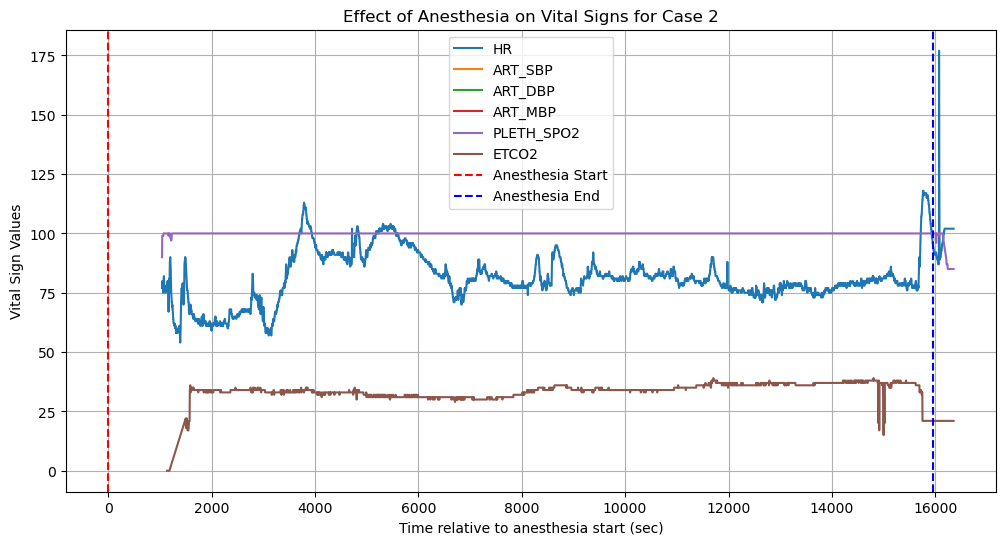

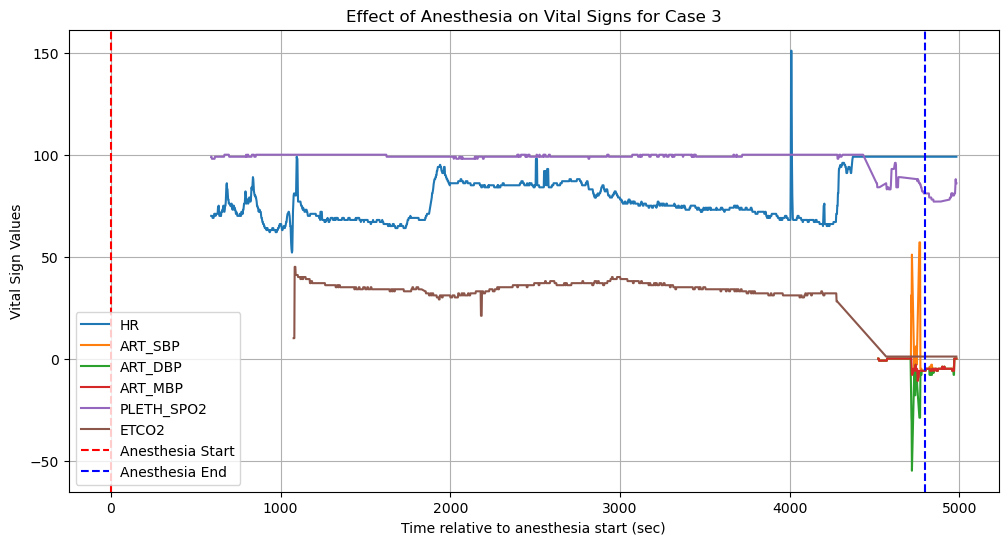

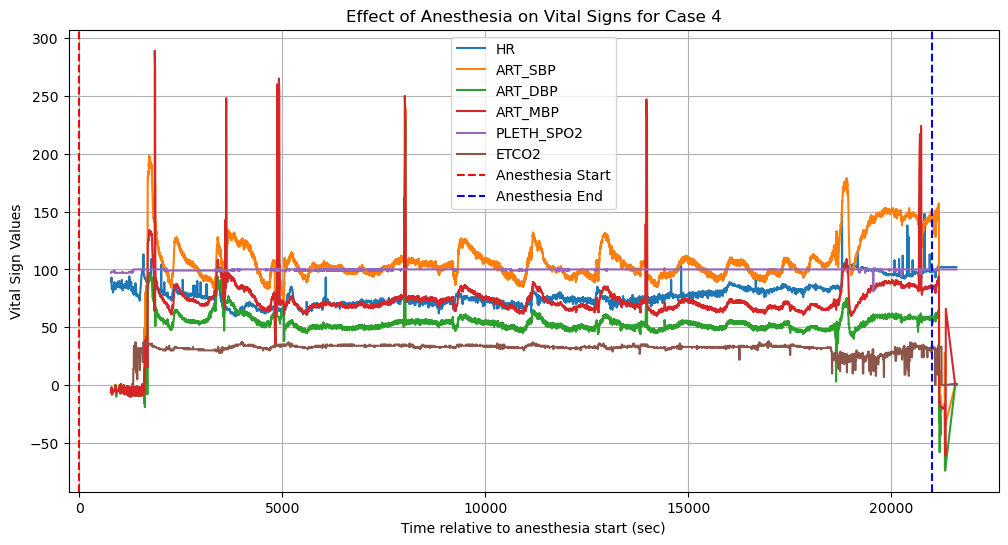

In [25]:
import pandas as pd
import vitaldb
import matplotlib.pyplot as plt

# Load clinical data from the API
url = 'https://api.vitaldb.net/cases'
clinical_data = pd.read_csv(url)

# Define the case IDs (replace with actual case numbers)
case_ids = [2, 3, 4]  # Change to your case numbers

# Define relevant tracks for anesthesia monitoring
tracks = [
    'Solar8000/HR',         # Heart Rate
    'Solar8000/ART_SBP',    # Systolic Blood Pressure
    'Solar8000/ART_DBP',    # Diastolic Blood Pressure
    'Solar8000/ART_MBP',    # Mean Arterial Pressure
    'Solar8000/PLETH_SPO2', # Oxygen Saturation (SpO2)
    'Solar8000/ETCO2'       # End-Tidal CO2 (EtCO2)
]

for case_id in case_ids:
    # Load the case data
    vf = vitaldb.VitalFile(case_id, tracks)

    # Convert to Pandas DataFrame
    df = vf.to_pandas(tracks, interval=1, return_datetime=True)

    # Retrieve anesthesia start and end times
    anestart = clinical_data.loc[clinical_data['caseid'] == case_id, 'anestart'].values[0]
    aneend = clinical_data.loc[clinical_data['caseid'] == case_id, 'aneend'].values[0]

    # Convert Time column to seconds relative to anesthesia start
    df['Time (sec)'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()
    df['Time (sec)'] -= anestart  # Make anesthesia start at t = 0

    # Convert columns to numeric (ignoring errors)
    df[tracks] = df[tracks].apply(pd.to_numeric, errors='coerce')

    # Interpolate missing values
    df[tracks] = df[tracks].interpolate()

    # Filter time range to show ±10 minutes before and after anesthesia
    df = df[(df['Time (sec)'] >= -600) & (df['Time (sec)'] <= (aneend - anestart) + 600)]

    # Plot vital signs over time
    plt.figure(figsize=(12, 6))
    for col in tracks:
        plt.plot(df['Time (sec)'], df[col], label=col.split('/')[1])

    # Add vertical lines for anesthesia start and end
    plt.axvline(x=0, color='r', linestyle='--', label='Anesthesia Start')
    plt.axvline(x=aneend - anestart, color='b', linestyle='--', label='Anesthesia End')

    # Labels and title
    plt.xlabel("Time relative to anesthesia start (sec)")
    plt.ylabel("Vital Sign Values")
    plt.title(f"Effect of Anesthesia on Vital Signs for Case {case_id}")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()